In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
from pystan import StanModel
import pystan

In [4]:
dat = pd.read_csv("Ardennes.csv", sep=" ")

In [5]:
dat

,Day,ForcesAllies,CasualtiesAllies,ForcesGermans,CasualtiesGermans
0,2,835178,2594,616924,2656
1,3,832510,3833,614215,4303
2,4,828689,3615,609930,3415
3,5,825133,4200,606524,3263
4,6,820936,3424,603258,3275
5,7,817495,1804,600009,3799
6,8,815699,2350,596181,2866
7,9,813336,2698,593326,4518
8,10,810657,2858,588834,6985
9,11,807744,2177,581811,5638


In [6]:
dat.columns

Index(['Day', 'ForcesAllies', 'CasualtiesAllies', 'ForcesGermans',
       'CasualtiesGermans'],
      dtype='object')

In [7]:
X1 = dat['ForcesAllies']
X2 = dat['ForcesGermans']

log_X1 = np.log(X1)
log_X2 = np.log(X2)

X = np.stack([log_X1, log_X2, log_X2, log_X1], 1).reshape(-1, 2,2)

In [8]:
X_centered = X - X.mean(axis=0)

In [9]:
N = dat.shape[0]

In [10]:
N

32

In [11]:
I = np.ones(N)
I[:5] = -1

In [12]:
y1 = dat['CasualtiesAllies']
y2 = dat['CasualtiesGermans']

y = np.c_[np.log(y1), np.log(y2)]

In [34]:
sm = pystan.StanModel(file='simple_model.stan')

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_b7794f1138f45e8eb14d4ad158be7bbb NOW.


In [35]:
fit = sm.sampling(data=dict(N = N,
                           X_centered = X_centered,
                           y = y,
                           I = I), 
                  iter=1000, 
                  chains=1)

In [37]:
la = fit.extract(permuted=True)  # return a dictionary of arrays


In [38]:
la.keys()

odict_keys(['gamma', 'phi', 'delta', 'V', 'lp__'])

In [39]:
import matplotlib.pyplot as plt

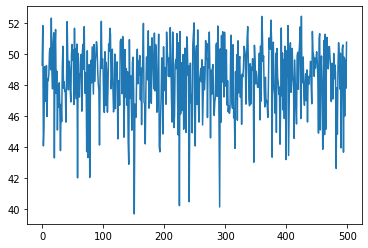

In [40]:
plt.plot(la['lp__'])

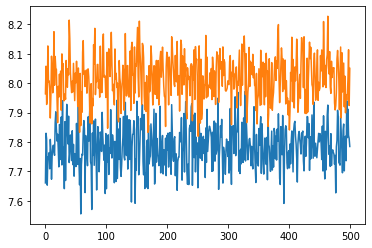

In [41]:
plt.plot(la['gamma'])

In [47]:
la['gamma'].mean(0),la['gamma'].std(0)

(array([7.78444735, 8.01757256]), array([0.07404265, 0.07672067]))

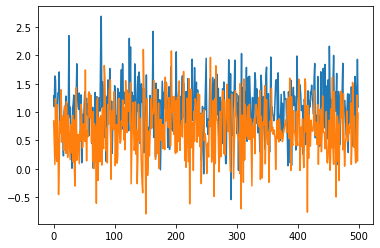

In [42]:
plt.plot(la['phi'])

In [48]:
la['phi'].mean(0),la['phi'].std(0)

(array([1.05767348, 0.70351034]), array([0.44179421, 0.48131185]))

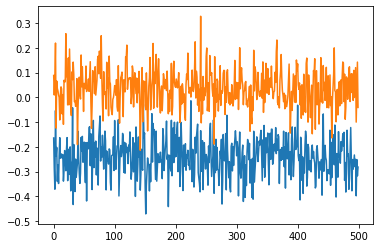

In [43]:
plt.plot(la['delta'])

In [49]:
la['delta'].mean(0),la['delta'].std(0)

(array([-0.24143136,  0.03547336]), array([0.07902889, 0.07554553]))

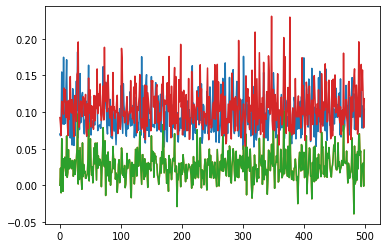

In [45]:
plt.plot(la['V'].reshape(-1,4))

In [50]:
la['V'].reshape(-1,4).mean(0),la['V'].reshape(-1,4).std(0)

(array([0.09696948, 0.02657005, 0.02657005, 0.10762733]),
 array([0.02520417, 0.01985868, 0.01985868, 0.02866049]))